In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'

# подключаем пакеты для рендеринга русского текста в LaTeX
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
mpl.rc('text.latex', preamble=r"\usepackage[russian]{babel}")

In [13]:
def plot_correlation_functions( time, corrfuncs, mean, title ):
    fig = plt.figure()
    plt.title(title)
    plt.xlabel(r'time, s')
    plt.ylabel(r'Correlation function')
    plt.xlim((0.0, 1.5e-13))
    
    final = np.loadtxt("./eqcorr_final.txt", delimiter=" ")
    plt.plot(time, final[:,1], color = 'b', lw = 2.0)
    
    for corrfunc in corrfuncs:
        plt.plot(time, corrfunc, color = '0.6', lw = 2.0)
    
    plt.plot(time, mean, 'r', lw = 2.0)
    plt.grid(linestyle = ':', alpha = 0.7)

In [3]:
def chunker(seq, size):
    return (tuple(seq[pos:pos+size]) for pos in xrange(0, len(seq), size))        
        
def mean( group ):
    return np.mean(group, axis = 0)
        
def group_by( lists, size ):
    res = []
   
    for group in chunker(range(len(lists)), size):
        res.append( mean([lists[g] for g in group]) )
    
    return res

In [11]:
from os import listdir
from os.path import isfile, join

path = './'
files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
#files = [f for f in files if 'mean' not in f]
files = [f for f in files if 'final' not in f and
                            '.ipynb' not in f]

times = []
corrfunc_blocks = []
for f in files:
    #print('f: {0}'.format(f))
    data = np.loadtxt(f, delimiter = " ")
    times.append(data[:, 0])
    corrfunc_blocks.append(data[:, 1])

<IPython.core.display.Javascript object>


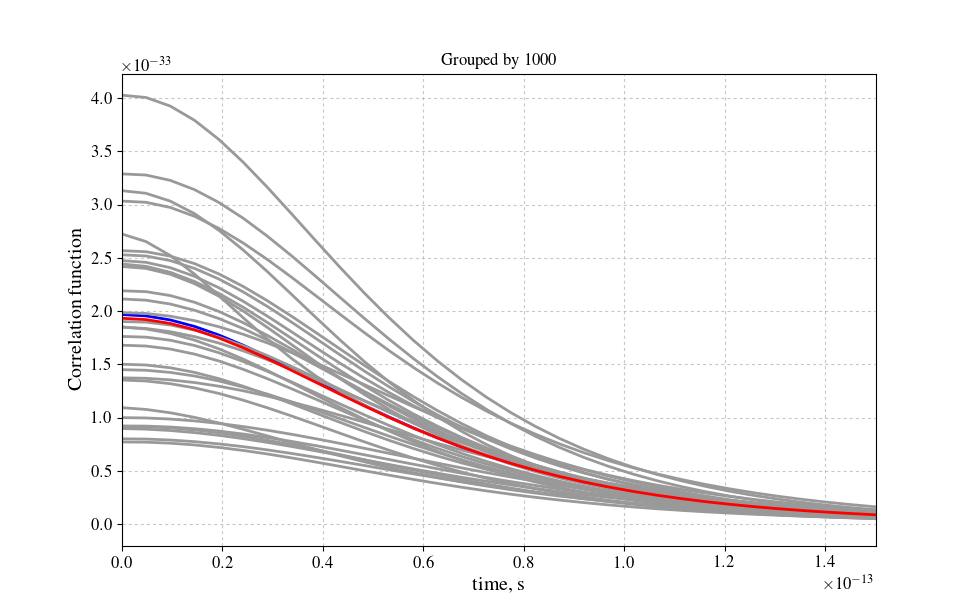

In [14]:
mean_corr_func = group_by( corrfunc_blocks, len(corrfunc_blocks) )[0]
plot_correlation_functions( times[0], corrfunc_blocks, mean_corr_func, "Grouped by 1000" )

<IPython.core.display.Javascript object>


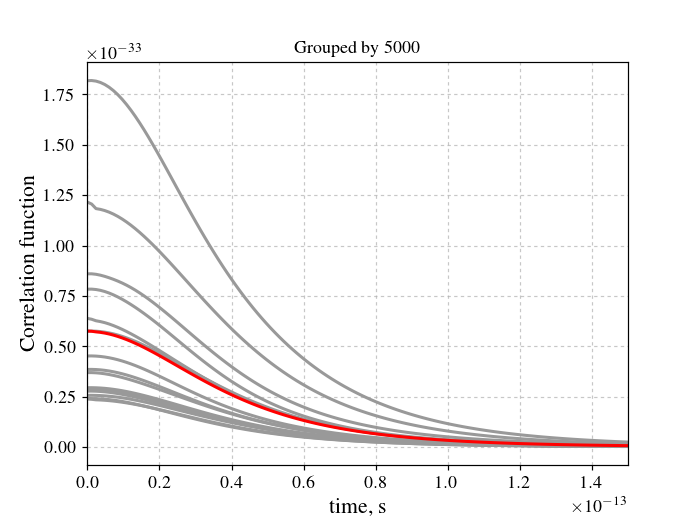

In [37]:
corrfunc_group = group_by( corrfunc_blocks, 5)
plot_correlation_functions( times[0], corrfunc_group, mean_corr_func, "Grouped by 5000" )

<IPython.core.display.Javascript object>


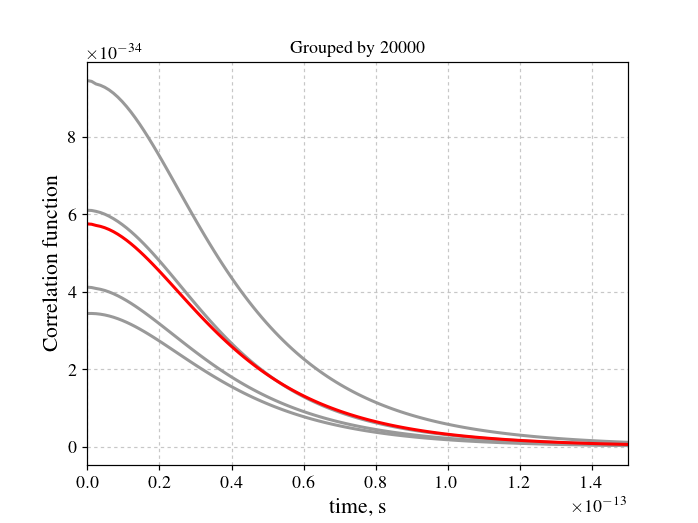

In [23]:
corrfunc_block = group_by( corrfunc_blocks, 20 )
plot_correlation_functions( times[0], corrfunc_block, mean_corr_func, "Grouped by 20000" )

<IPython.core.display.Javascript object>


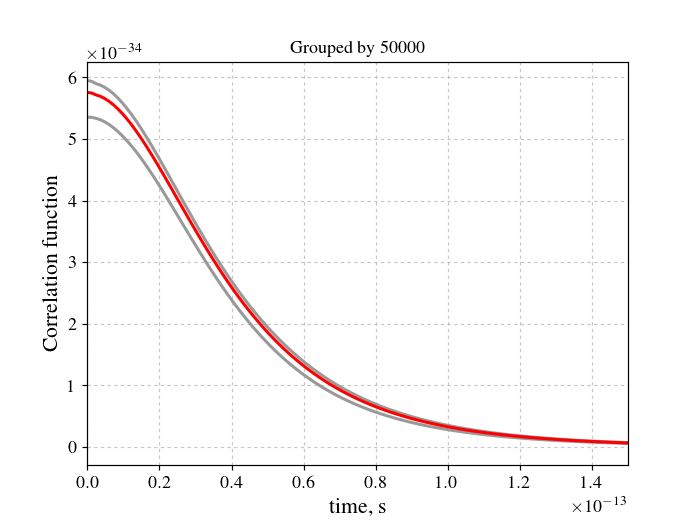

In [24]:
corrfunc_block = group_by( corrfunc_blocks, 50 )
plot_correlation_functions( times[0], corrfunc_block, mean_corr_func, "Grouped by 50000" )

In [21]:
# сохраняем среднее значение
#t = np.concatenate( (-times[0][::-1], times[0]), axis = 0 )
#m = np.concatenate( (mean_corr_func[::-1], mean_corr_func), axis = 0 )
#data = np.vstack((t, m))
#np.savetxt("./blocksFULLTRAJ/mean.txt",  np.transpose(data))

m = np.mean(corrfunc_blocks, axis = 0)
m[10]

5.2435317567567571e-34

<IPython.core.display.Javascript object>


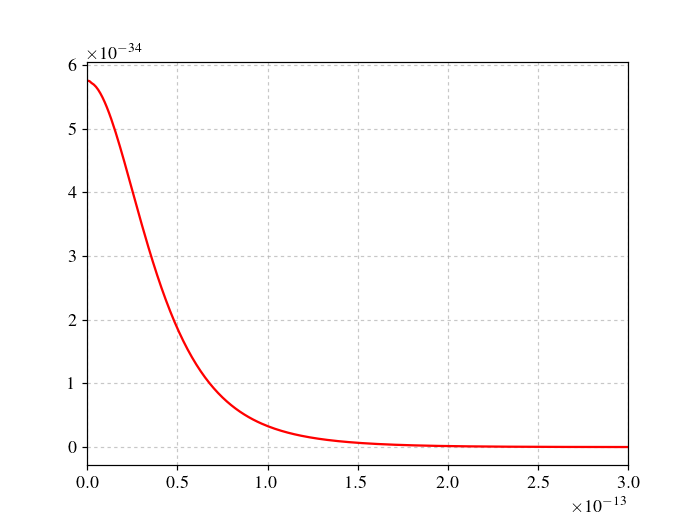

In [7]:
fig = plt.figure()
plt.plot(times[0], mean_corr_func, color = 'r')
plt.xlim((0.0, 3e-13))
plt.grid(linestyle = ':', alpha = 0.7)

In [10]:
# 15-04-2018
cf_30000 = np.loadtxt("./experiments/maxtrajlen_100_samples_30000/eqcorr_final.txt", delimiter = " ")
cf_50000 = np.loadtxt("./experiments/maxtrajlen_100_samples_50000/eqcorr_final.txt", delimiter = " ")
cf_100000 = np.loadtxt("./experiments/maxtrajlen_100_samples_100000/eqcorr_final.txt", delimiter = " ")
cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat", delimiter = " " ) # функция рассчитанная Локштановым

<IPython.core.display.Javascript object>


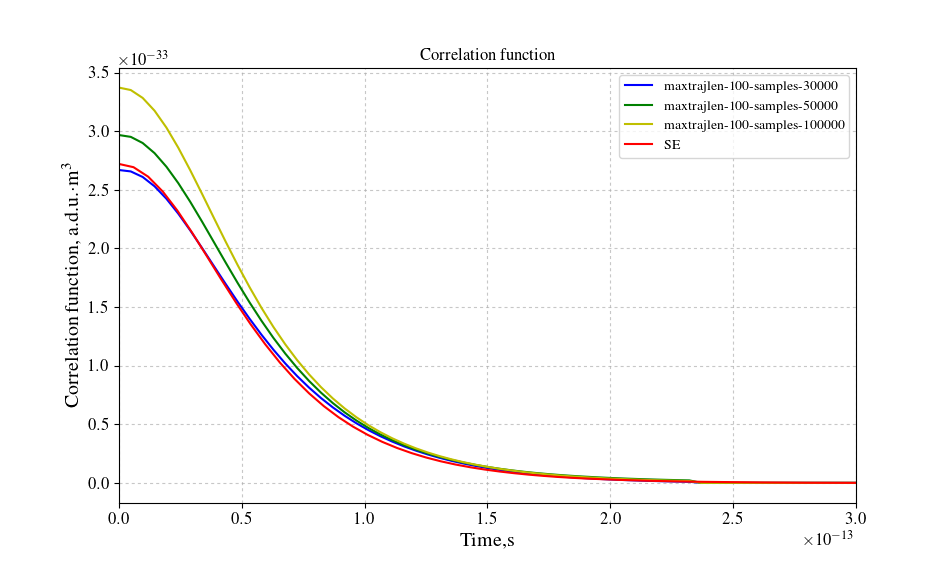

In [17]:
fig = plt.figure()
l1, = plt.plot( cf_30000[:, 0], cf_30000[:, 1], color = 'b', lw = 1.5)
l2, = plt.plot( cf_50000[:, 0], cf_50000[:, 1], color = 'g', lw = 1.5)
l3, = plt.plot( cf_100000[:, 0], cf_100000[:, 1], color = 'y', lw = 1.5)
l4, = plt.plot( cf_SE[:, 0], cf_SE[:, 1], color = 'r', lw = 1.5)

plt.xlim((0.0, 3.0e-13))

plt.title('Correlation function')
plt.xlabel('Time,s ')
plt.ylabel(u'Correlation function, a.d.u.$\cdot$m$^3$')

plt.legend((l1, l2, l3, l4), ('maxtrajlen-100-samples-30000', 'maxtrajlen-100-samples-50000', 'maxtrajlen-100-samples-100000', 'SE'))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


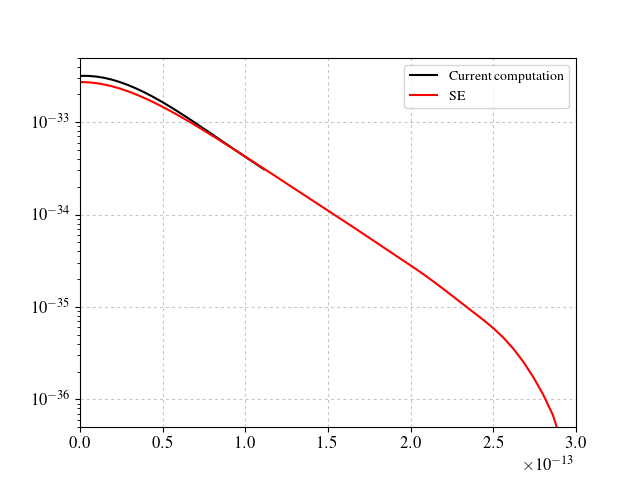

In [12]:
fig = plt.figure()
l1, = plt.semilogy( cf_30000[:, 0], cf_30000[:, 1], color = 'k', lw = 1.5)
l2, = plt.semilogy( cf_SE[:, 0], cf_SE[:, 1], color = 'r', lw = 1.5)

plt.xlim((0.0, 3.0e-13))
plt.ylim((5.0e-37, 5.0e-33))

plt.legend((l1, l2), ('Current computation', 'SE'))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


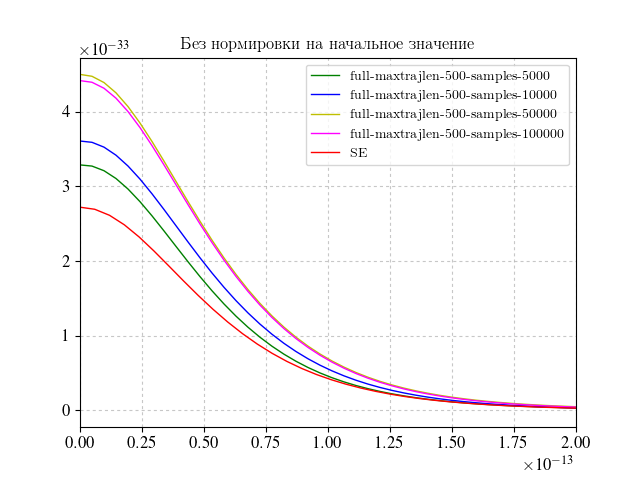

<IPython.core.display.Javascript object>


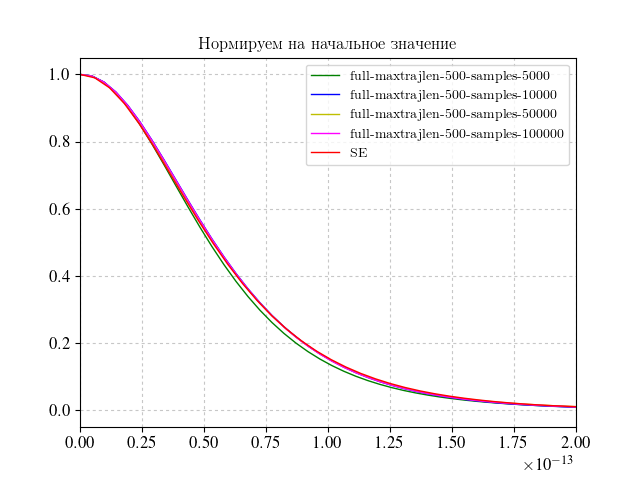

<IPython.core.display.Javascript object>


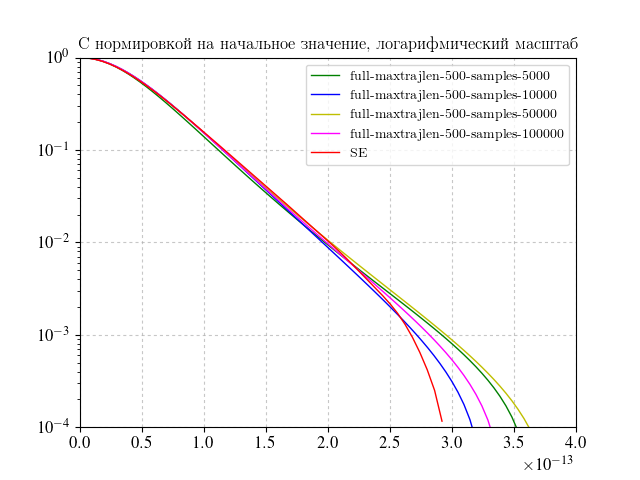

In [38]:
cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat", delimiter = " " ) # функция рассчитанная Локштановым
cf_full_5000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_5000/eqcorr_final.txt", delimiter = " ")
cf_full_10000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_10000/eqcorr_final.txt", delimiter = " ")
cf_full_50000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_50000/eqcorr_final.txt", delimiter = " ")
cf_full_100000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_100000/eqcorr_final.txt", delimiter = " ")

# без нормировки на начальное значение
fig = plt.figure()
plt.title(u'Без нормировки на начальное значение')
l1, = plt.plot( cf_full_5000[:,0], cf_full_5000[:,1], color = 'g', lw = 1.0)
l2, = plt.plot( cf_full_10000[:, 0], cf_full_10000[:, 1], color = 'b', lw = 1.0)
l3, = plt.plot( cf_full_50000[:, 0], cf_full_50000[:, 1], color = 'y', lw = 1.0)
l4, = plt.plot( cf_full_100000[:, 0], cf_full_100000[:, 1], color = 'magenta', lw = 1.0)
l5, = plt.plot( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('full-maxtrajlen-500-samples-5000', 
                              'full-maxtrajlen-500-samples-10000', 
                              'full-maxtrajlen-500-samples-50000',
                              'full-maxtrajlen-500-samples-100000',
                              'SE'))

plt.xlim((0.0, 2e-13))
plt.grid(linestyle = ':', alpha = 0.7)

# нормируем на начальное значение
cf_SE[:,1] /= cf_SE[0,1]
cf_full_5000[:,1] /= cf_full_5000[0,1]
cf_full_10000[:,1] /= cf_full_10000[0,1]
cf_full_50000[:,1] /= cf_full_50000[0, 1]
cf_full_100000[:,1] /= cf_full_100000[0, 1]

fig = plt.figure()
plt.title(u'Нормируем на начальное значение')
l1, = plt.plot( cf_full_5000[:,0], cf_full_5000[:,1], color = 'g', lw = 1.0)
l2, = plt.plot( cf_full_10000[:, 0], cf_full_10000[:, 1], color = 'b', lw = 1.0)
l3, = plt.plot( cf_full_50000[:, 0], cf_full_50000[:, 1], color = 'y', lw = 1.0)
l4, = plt.plot( cf_full_100000[:, 0], cf_full_100000[:, 1], color = 'magenta', lw = 1.0)
l5, = plt.plot( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('full-maxtrajlen-500-samples-5000', 
                              'full-maxtrajlen-500-samples-10000', 
                              'full-maxtrajlen-500-samples-50000',
                              'full-maxtrajlen-500-samples-100000',
                              'SE'))

plt.xlim((0.0, 2e-13))
plt.grid(linestyle = ':', alpha = 0.7)

fig = plt.figure()
plt.title(u'С нормировкой на начальное значение, логарифмический масштаб')
l1, = plt.semilogy( cf_full_5000[:,0], cf_full_5000[:,1], color = 'g', lw = 1.0)
l2, = plt.semilogy( cf_full_10000[:, 0], cf_full_10000[:, 1], color = 'b', lw = 1.0)
l3, = plt.semilogy( cf_full_50000[:, 0], cf_full_50000[:, 1], color = 'y', lw = 1.0)
l4, = plt.semilogy( cf_full_100000[:, 0], cf_full_100000[:, 1], color = 'magenta', lw = 1.0)
l5, = plt.semilogy( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('full-maxtrajlen-500-samples-5000', 
                              'full-maxtrajlen-500-samples-10000', 
                              'full-maxtrajlen-500-samples-50000',
                              'full-maxtrajlen-500-samples-100000',
                              'SE'))
plt.xlim((0.0, 4.0e-13))
plt.ylim((1e-4, 1.0))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


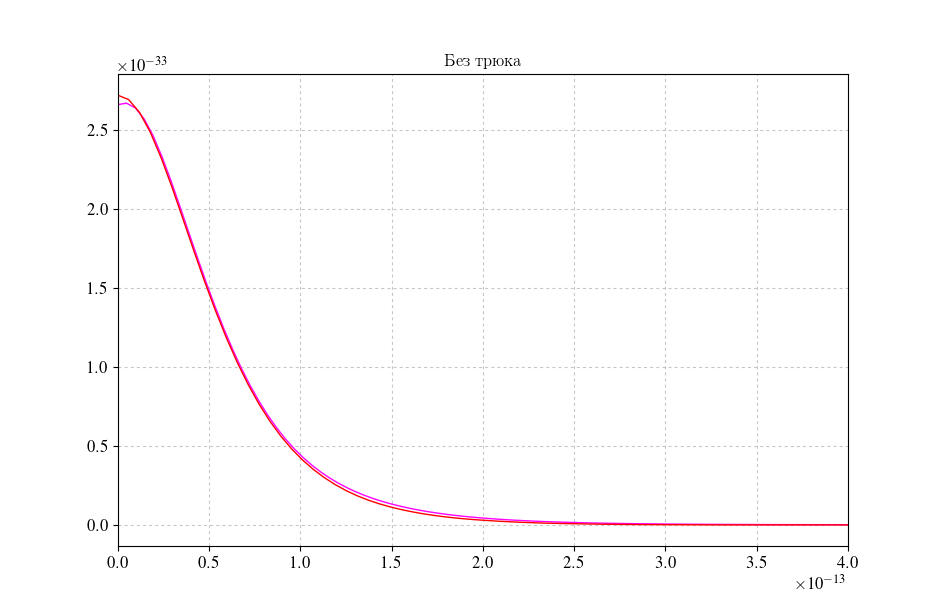

In [6]:
without_trick_cf_50000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_50000/eqcorr_final.txt")
without_trick_cf_200000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_200000/eqcorr_final.txt")
without_trick_cf_500000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_500000/eqcorr_final.txt")

cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat")

fig = plt.figure()
plt.title(u'Без трюка')
#l1, = plt.plot( without_trick_cf_50000[:,0], without_trick_cf_50000[:,1], color = 'b', lw = 1.0)
#l2, = plt.plot( without_trick_cf_200000[:,0], without_trick_cf_200000[:,1], color = 'g', lw = 1.0)
l3, = plt.plot( without_trick_cf_500000[:,0], without_trick_cf_500000[:,1], color = 'magenta', lw = 1.0)
l4, = plt.plot( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0 )

#plt.legend((l1, l2, l3, l4), ('without-trick-maxtrajlen-500-samples-50000',
#                          'without-trick-maxtrajlen-500-samples-200000',
#                          'without-trick-maxtrajlen-500-samples-500000',
#                         'SE'))
plt.xlim((0.0, 4.0e-13))
#plt.ylim((1e-4, 1.0))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


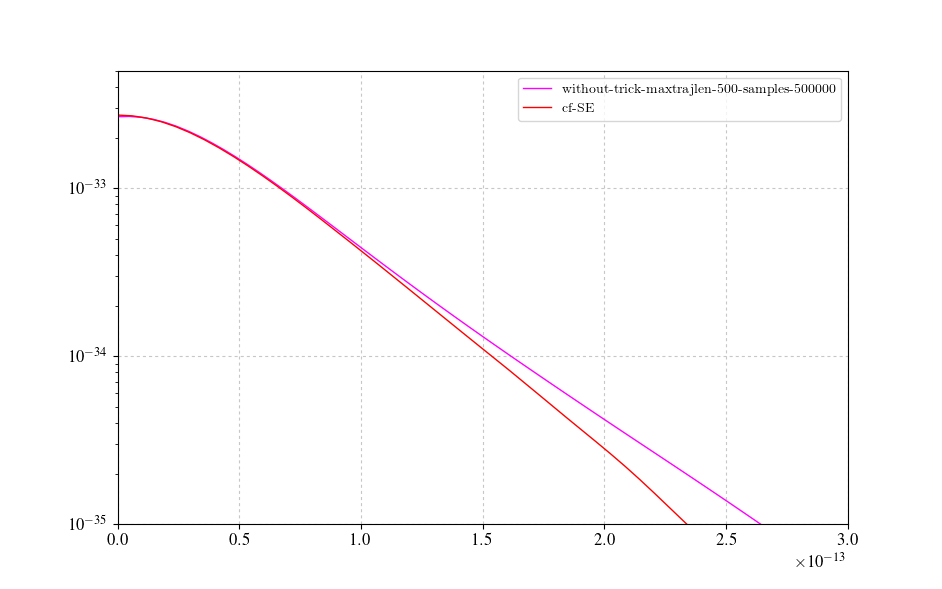

(1e-35, 5e-33)

In [12]:
without_trick_cf_50000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_50000/eqcorr_final.txt")
without_trick_cf_200000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_200000/eqcorr_final.txt")
without_trick_cf_500000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_500000/eqcorr_final.txt")
cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat")

fig = plt.figure()

l3, = plt.semilogy(without_trick_cf_500000[:,0], without_trick_cf_500000[:,1], color = 'magenta', lw = 1.0)
l4, = plt.semilogy(cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l3, l4), ('without-trick-maxtrajlen-500-samples-500000',
                      'cf-SE'))
plt.grid(linestyle = ':', alpha = 0.7)

plt.xlim((0.0, 3.0e-13))
plt.ylim((1.0e-35, 5.0e-33))

<IPython.core.display.Javascript object>


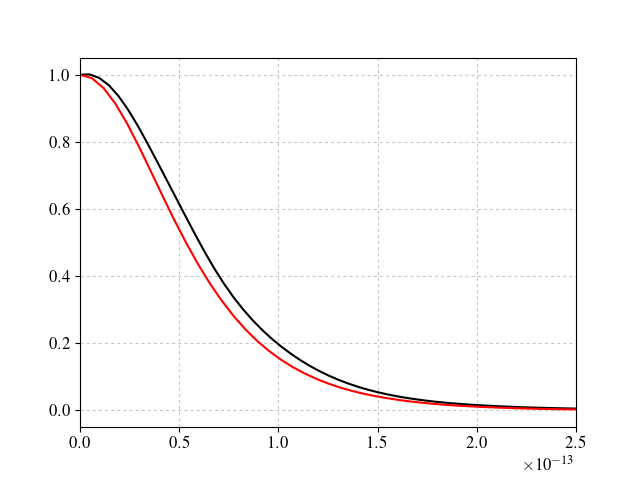

In [15]:
cf_normed = np.loadtxt("./eqcorr_final.txt")
cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat")

cf_SE[:,1] /= cf_SE[0,1]

fig = plt.figure()
plt.plot(cf_normed[:,0], cf_normed[:,1], color = 'k')
plt.plot(cf_SE[:,0], cf_SE[:,1], color = 'r')

plt.xlim((0.0, 2.5e-13))
plt.grid(linestyle = ':', alpha = 0.7)